# Titanic
* [Analiz](#1)
* [Görselleştirme](#2)

<a id="1"></a> <br>
## Analiz

In [1]:
# kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# veri setinin import edilip kullanıma hazır hale getirilmesi
titanic = sns.load_dataset("titanic")
df = titanic.copy()

In [3]:
# veri setine ilk bakış
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Veri Setinin Hikayesi
**Titanik gemisindeki yolcuların özelliklerini ve durumunu ele alan veri setidir.**
* **survived**: gemi kazasından sonra hayatta kalmayı ifade eder. (0:ölü, 1:hayatta)
* **pclass**: gemideki yolcuların hangi sınıfta seyahat ettiklerini belirtir. (3, 2, 1)
* **sex**: yolcunun cinsyeti (male, female)
* **age**: yolcunun yaşı
* **sibsp**: yolcunun kardeş ve/veya eş sayısı
* **parch**: yolcunun ebeveyn ve/veya çocuk sayısı
* **fare**: yolcunun ödediği ücret
* **embarked**: yolcunun bindiği liman (S, C, Q)
* **class**: yolcunun seyahat ettiği sınıf (Third, Second, First)
* **who**: yolcunun cinsiyeti (man, woman, child)
* **adult_male**: yolcunun yetişkin bir erkek olup olmadığını sorgular (True: yetişkin erkek, False: değil)
* **deck**: yolcunun gittiği güverte
* **embark_town**: yolcunun bindiği limanın bulunduğu şehir (Southampton, Cherbourg, Queenstown)
* **alive**: yolcunun hayatta kalıp kalmadığını sorgular (yes: hayatta, no: değil)
* **alone**: yolcunun gemide yalnız olup olmadığını sorgular (True: yalnız, False: yalnız değil)

In [4]:
# veri setinin son 5 gözlemi
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
# veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


* DataFrame
* 891 gözlem var
* 15 değişkenden oluşuyor (2 tane bool, 2 tane category, 2 tane float, 2 tane int, 5 tane object)
* 80.6+ KB yer kaplıyor

In [7]:
# veri setindeki object veri tiplerinin category veri tiplerine dönüşümü
df.sex = pd.Categorical(df.sex)
df.embarked = pd.Categorical(df.embarked)
df.who = pd.Categorical(df.who)
df.embark_town = pd.Categorical(df.embark_town)
df.alive = pd.Categorical(df.alive)

In [40]:
# veri setindeki değişkenlerin veri tipleri
df.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive          category
alone              bool
dtype: object

In [8]:
# veri setinin gözlem ve değişken sayısı
df.shape
print(f"Veri setinin gözlem sayısı: {df.shape[0]}")
print(f"Veri setinin değişken sayısı: {df.shape[1]}")

Veri setinin gözlem sayısı: 891
Veri setinin değişken sayısı: 15


In [9]:
# veri setindeki değişken isimleri
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
# veri setindeki betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* age: gemideki ortalama yaş: 29, en genç yolcu: 5 aylık bebek, en yaşlı yolcu: 80 yaşında
* sibsp: gemide 8 kişilik bir akraba grubu var
* parch: gemide 6 kişilik bir aile var

In [11]:
# eksik değer var mı?
df.isnull().values.any()

True

In [12]:
# hangi değişkende kaçar tane eksik veri var
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 177 kişinin yaş bilgisi yok
* 688 kişinin güverte bilgisi yok
* 2 kişinin nereden bindiği belli değil

In [13]:
# kategorik değişkenler
kat_df = df.select_dtypes(include = ["category"])
kat_df.head()

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,NaN,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,NaN,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,NaN,Southampton,no


In [14]:
# kategorik değişkenlerin sınıflarına erişmek
kat_df.who.unique()

[man, woman, child]
Categories (3, object): [man, woman, child]

In [15]:
# kategorik değişkenlerin sınıf sayısına erişmek
kat_df.who.value_counts().count()

3

In [16]:
# kategorik değişkenlerin sınıf frekansına erişmek
kat_df.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

* erkek sayısı kadın sayısının yaklaşık 2 katı
* çocuk sayısı toplam yolcunun yaklaşık %10u kadar

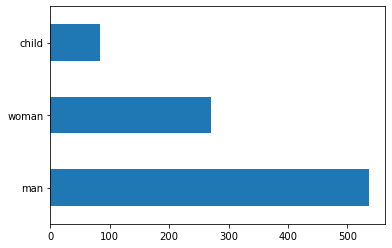

In [35]:
# kategorik değişkenlerin sınıf frekansını grafiğe dökmek
kat_df.who.value_counts().plot.barh();

In [36]:
# nümerik değişkenler
num_df = df.select_dtypes(include = ["float64","int64"])
num_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [19]:
# nümerik değişkenlerin betimsel istatistikleri
num_df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [20]:
# rapor
print(f"Ortalama yaş: {num_df.age.mean()}")
print(f"Yaşı bilinen kişi sayısı: {num_df.age.count()}")
print(f"En genç yolcunun yaşı: {num_df.age.min()}")
print(f"En yaşlı yolcunun yaşı: {num_df.age.max()}")

Ortalama yaş: 29.69911764705882
Yaşı bilinen kişi sayısı: 714
En genç yolcunun yaşı: 0.42
En yaşlı yolcunun yaşı: 80.0


In [21]:
# ordinal olan kategorik değişkenleri değiştirmek
from pandas.api.types import CategoricalDtype
class_kategoriler = ["Third","Second","First"]
df["class"] = df["class"].astype(CategoricalDtype(categories = class_kategoriler, ordered = True))
df["class"].head(1)

0    Third
Name: class, dtype: category
Categories (3, object): [Third < Second < First]

<a id="2"></a> <br>
## Görselleştirme

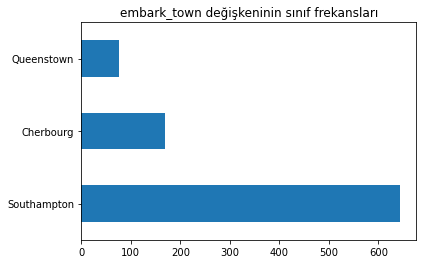

In [22]:
# kategorik değişkenin sınıflarının frekanslarını görselleştirmek
(df.embark_town # veri
 .value_counts() # istenilen değerler
 .plot.barh() # görselleştirme
 .set_title("embark_town değişkeninin sınıf frekansları")); # başlık verme

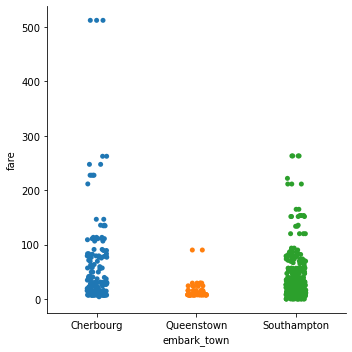

In [23]:
# veri setinde yer alan değişkenlerin birlikte değerlendirilmesi
sns.catplot(x = "embark_town", y = "fare", data = df);

* Cherbourg'dan her sınıftan insan biniyor.
* Queenstown'dan daha çok maddi durumu iyi olmayan insanlar biniyor.
* Southampton'dan binen yolcu diğer iki limana göre daha fazla.

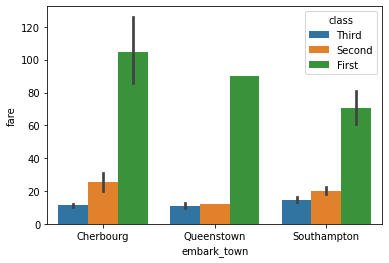

In [24]:
# grafiğe üçüncü bir boyut ekleyerek bilgiyi detaylandırmak
sns.barplot(x = "embark_town", y = "fare", hue = "class", data =  df);

* Cherbourg'dan binen birinci sınıf yolcular diğer limanlara göre ortalama daha fazla ücret ödemiş.
* Queenstown'dan binen ikinci ve üçüncü sınıf yolcular diğer limanlara göre ortalama daha az ödemiş.
* Southampton'dan binen birinci sınıf yolcular diğer limanlara göre ortalama daha az ücret ödemiş.

In [25]:
# verinin sunduğu bilgiyi doğrulamak
df.groupby(["embark_town","class"])["fare"].mean()

embark_town  class 
Cherbourg    Third      11.214083
             Second     25.358335
             First     104.718529
Queenstown   Third      11.183393
             Second     12.350000
             First      90.000000
Southampton  Third      14.644083
             Second     20.327439
             First      70.364862
Name: fare, dtype: float64

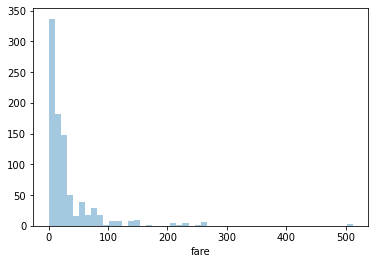

In [26]:
# nümerik değişkenin histogramı
sns.distplot(df.fare, kde = False);

* Yolcuların büyük çoğunluğu düşük ücret ödemiş. 
* Ücret genel olarak 0 ile 100 birim arasına dağılmış şekilde.

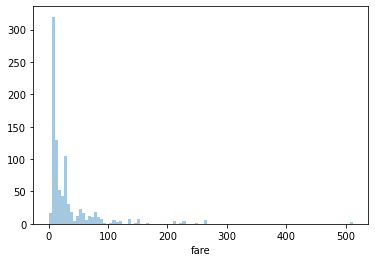

In [27]:
# nümerik değişkenin hassas histogramı
sns.distplot(df.fare, bins = 100, kde = False);

* bins arttıkça grafiğin hassaslığı artar.

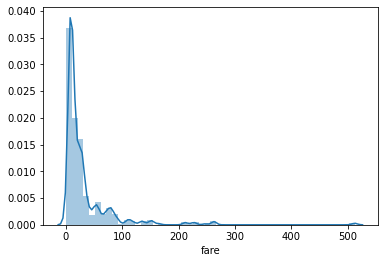

In [28]:
# histogram ve yoğunluk grafiği
sns.distplot(df.fare);

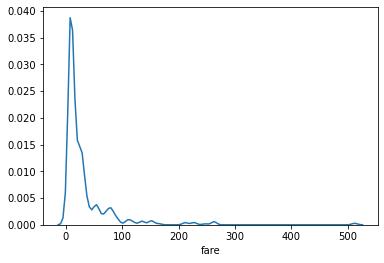

In [29]:
# yoğunluk grafiği
sns.distplot(df.fare, hist = False);

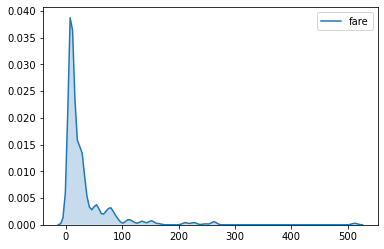

In [30]:
# karalı yoğunluk grafiği
sns.kdeplot(df.fare, shade = True);

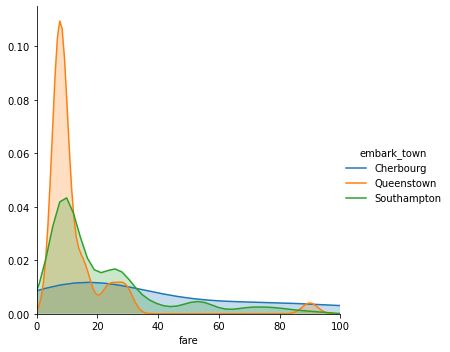

In [37]:
# grafiğe yakından ve daha detaylı bakmak
(sns
 .FacetGrid(df, 
            hue = "embark_town", 
            height = 5, 
            xlim = (0, 100))
 .map(sns.kdeplot, "fare", shade = True)
 .add_legend()
);

* Ücretlerin büyük çoğunluğu Queenstown limanından ödenmiş.

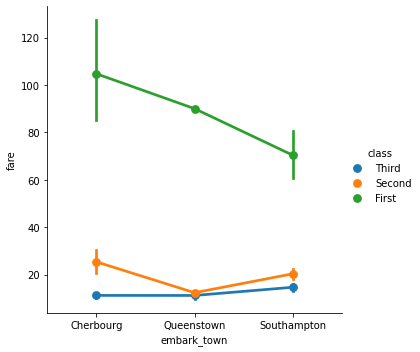

In [32]:
# noktalı üç boyutlu grafik
sns.catplot(x = "embark_town", y = "fare", hue = "class", kind = "point", data = df);

* Üçüncü sınıftan binenler ortalama 90 birim ödemiş.
* Queenstown'dan binen ikinci ve üçüncü sınıf yolcular aynı ücreti ödemiş. 
* Ücret sıralaması genel olarak üçüncü sınıftan birinci sınıfa gidildikçe artmış.

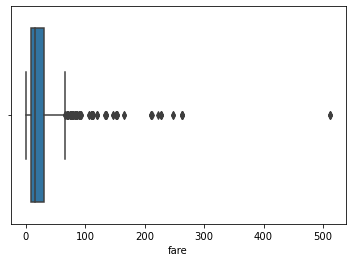

In [39]:
# kutu grafiği - yatay
sns.boxplot(x = df.fare);

* veri setinde çok fazla aykırı değer var.

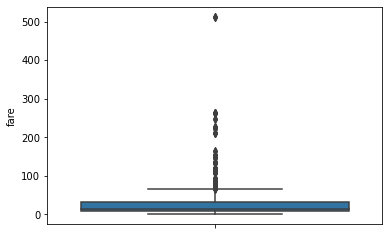

In [34]:
# kutu grafiği - dikey
sns.boxplot(x = df.fare, orient = "v");